# Loan approval prediction for the U.S. Small Business Administration: Performance analysis of different machine learning algorithms

## Contents<a id='Contents'></a>
* [1 Introduction](#1_Introduction)
* [2 Imports](#2_Imports)
* [3 Load data](#3_Load_data)
    * [3.1 Convert currency values to numeric values](#3.1_Convert_currency_values_to_numeric_values)
    * [3.2 Number of loans for each state](#3.2_Number_of_loans_for_each_state)
    * [3.3 Number of instances for each sector](#3.3_Number_of_instances_for_each_sector)
    * [3.4 Target variable](#3.4_Target_variable)
* [4 Choose a state](#4_Choose_a_state)
    * [4.1 Data wrangling](#4.1_Data_wrangling)
    * [4.2 Save data](#4.2_Save_data)
* [5 Summary](#5_Summary)

## 1 Introduction<a id='1_Introduction'></a>

This data science project addresses the following question: "Should a loan be approved or denied by the U.S. Small Business Administration (SBA)?" The dataset used in the project is a real dataset from the U.S. Small Business Administration (SBA). The dataset is available here: https://doi.org/10.1080/10691898.2018.1434342. It is provided with the following article: *Min Li, Amy Mickel & Stanley Taylor (2018) "Should This Loan be Approved or Denied?": A Large Dataset with Class Assignment Guidelines, Journal of Statistics Education, 26:1, 55-66, DOI: 10.1080/10691898.2018.1434342.* The article presents guidelines to teach statistics as an investigative process of decision making, wherein students assume the role of loan officer at a bank and decide whether to approve or deny a loan by assessing its risk of default.

As mentioned in the article, "the U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market. Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. One way SBA assists these small business enterprises is through a loan guarantee program which is designed to encourage banks to grant loans to small businesses. SBA acts much like an insurance provider to reduce the risk for a bank by taking on some of the risk through guaranteeing a portion of the loan. In the case that a loan goes into default, SBA then covers the amount they guaranteed." 

Although there have been many success stories of start-ups receiving SBA loan guarantees, there have also been some start-ups that have defaulted on their loans. Since SBA loans only guarantee a portion of the entire loan balance, banks will incur some losses if a small business defaults on its SBA-guaranteed loan. Because of the high risk of default, banks are still faced with a difficult choice as to whether such a loan should be granted. One way to inform their decision making is through analyzing relevant historical data, such as the datasets provided in the article, and use data science and machine learning techniques to build efficient and robust models that can predict whether a small business will default on its loan.

This data science project, therefore, addresses the following questions:
* How can machine learning help in making decisions about whether a loan should be approved or denied by the U.S. SBA? 
* How do the different machine learning algorithms compare in terms of predictive ability, model complexity and computational intensity?
* What are the important data features that affect a model's performance?
* If necessary, what other data should be collected to improve a model's performance and help in accurate decision making?

## 2 Imports<a id='2_Imports'></a>

In [1]:
# Import required libraries and functions
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## 3 Load data<a id='3_Load_data'></a>

Note: Two datasets are provided with the article: (a) "National SBA" dataset (named SBAnational.csv) from the U.S. SBA which includes historical data from 1987 through 2014 (899,164 observations), and (b) “SBA Case” dataset (named SBAcase.csv) which is used in the assignment described in the paper (2102 observations). The “SBA Case” dataset is a subset of the "National SBA."

The dataset used in this project is "National SBA" (SBAnational.csv).

In [2]:
# Load original data into dataframe
start_time = time.time()
df = pd.read_csv('../data_models/raw_data/SBAnational.csv',low_memory=False)
print("Execution time = %.2f seconds" % (time.time() - start_time))

Execution time = 10.93 seconds


In [3]:
# Check shape of original dataframe
df.shape

(899164, 27)

In [4]:
# Examine data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [5]:
# Create a DataFrame for description of features
featuresdict = {'Variable name': ["LoanNr_ChkDgt", "Name", "City", "State", "Zip", "Bank", 
                                  "BankState", "NAICS", "ApprovalDate", "ApprovalFY", "Term", 
                                  "NoEmp", "NewExist", "CreateJob", "RetainedJob", 
                                  "FranchiseCode", "UrbanRural", "RevLineCr", "LowDoc", 
                                  "ChgOffDate", "DisbursementDate", "DisbursementGross", 
                                  "BalanceGross", "MIS_Status", "ChgOffPrinGr", "GrAppv", 
                                  "SBA_Appv"],
                'Data type': ["Text", "Text", "Text", "Text", "Text", "Text", "Text", "Text", 
                              "Date/Time", "Text", "Number", "Number", "Text", "Number", 
                              "Number", "Text", "Text", "Text", "Text", "Date/Time", 
                              "Date/Time", "Currency", "Currency", "Text", "Currency", 
                              "Currency", "Currency"],
                'Description of variable': ["Identifier – Primary key",
                                            "Borrower name", "Borrower city", 
                                            "Borrower state", "Borrower zip code", 
                                            "Bank name", "Bank state", "North American \
                                            industry classification system code", 
                                            "Date SBA commitment issued", 
                                            "Fiscal year of commitment", 
                                            "Loan term in months", 
                                            "Number of business employees",
                                            "1 = Existing business, 2 = New business",
                                            "Number of jobs created", 
                                            "Number of jobs retained", 
                                            "Franchise code, (00000 or 00001) = No franchise",
                                            "1 = Urban, 2 = rural, 0 = undefined",
                                            "Revolving line of credit: Y = Yes, N = No",
                                            "LowDoc Loan Program: Y = Yes, N = No",
                                            "The date when a loan is declared to be \
                                            in default", "Disbursement date", 
                                            "Amount disbursed", "Gross amount outstanding", 
                                            "Loan status charged off = CHGOFF, Paid in \
                                            full = PIF", "Charged-off amount", 
                                            "Gross amount of loan approved by bank", 
                                            "SBA’s guaranteed amount of approved loan"]}
featuresdf = pd.DataFrame(data=featuresdict)
featuresdf

,Variable name,Data type,Description of variable
0,LoanNr_ChkDgt,Text,Identifier – Primary key
1,Name,Text,Borrower name
2,City,Text,Borrower city
3,State,Text,Borrower state
4,Zip,Text,Borrower zip code
5,Bank,Text,Bank name
6,BankState,Text,Bank state
7,NAICS,Text,North American ...
8,ApprovalDate,Date/Time,Date SBA commitment issued
9,ApprovalFY,Text,Fiscal year of commitment


In [6]:
# Explore initial entries of data
df.head().T

,0,1,2,3,4
LoanNr_ChkDgt,1000014003,1000024006,1000034009,1000044001,1000054004
Name,ABC HOBBYCRAFT,LANDMARK BAR & GRILLE (THE),"WHITLOCK DDS, TODD M.","BIG BUCKS PAWN & JEWELRY, LLC","ANASTASIA CONFECTIONS, INC."
City,EVANSVILLE,NEW PARIS,BLOOMINGTON,BROKEN ARROW,ORLANDO
State,IN,IN,IN,OK,FL
Zip,47711,46526,47401,74012,32801
Bank,FIFTH THIRD BANK,1ST SOURCE BANK,GRANT COUNTY STATE BANK,1ST NATL BK & TR CO OF BROKEN,FLORIDA BUS. DEVEL CORP
BankState,OH,IN,IN,OK,FL
NAICS,451120,722410,621210,0,0
ApprovalDate,28-Feb-97,28-Feb-97,28-Feb-97,28-Feb-97,28-Feb-97
ApprovalFY,1997,1997,1997,1997,1997


### 3.1 Convert currency values to numeric values<a id='3.1_Convert_currency_values_to_numeric_values'></a>

In [7]:
# Convert the features with currency values to numeric values
def currency_conv(colname, conv_type):
    for col in colname:
        df[col] = df[col].replace('[\$,]', '', regex=True).astype(conv_type)
    return df

colname = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
conv_type = float
start_time = time.time()
currency_conv(colname, float)

# Check if the conversion worked
df[colname].head().T

,0,1,2,3,4
DisbursementGross,60000.0,40000.0,287000.0,35000.0,229000.0
BalanceGross,0.0,0.0,0.0,0.0,0.0
ChgOffPrinGr,0.0,0.0,0.0,0.0,0.0
GrAppv,60000.0,40000.0,287000.0,35000.0,229000.0
SBA_Appv,48000.0,32000.0,215250.0,28000.0,229000.0


In [8]:
# Check data types of the features with currency values
col_list = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
for col in col_list:
    print(col, ":", df[col].dtype)

DisbursementGross : float64
BalanceGross : float64
ChgOffPrinGr : float64
GrAppv : float64
SBA_Appv : float64


In [9]:
# Display statistical information of numerical (and continuous) variables
df.drop(['LoanNr_ChkDgt', 'Zip', 'NAICS', 'NewExist', 
         'FranchiseCode', 'UrbanRural'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Term,899164.0,110.773078,78.857305,0.0,60.0,84.0,120.0,569.0
NoEmp,899164.0,11.411353,74.108196,0.0,2.0,4.0,10.0,9999.0
CreateJob,899164.0,8.430376,236.688165,0.0,0.0,0.0,1.0,8800.0
RetainedJob,899164.0,10.797257,237.120600,0.0,0.0,1.0,4.0,9500.0
DisbursementGross,899164.0,201154.016731,287640.849988,0.0,42000.0,100000.0,238000.0,11446325.0
BalanceGross,899164.0,2.989349,1442.161912,0.0,0.0,0.0,0.0,996262.0
ChgOffPrinGr,899164.0,13503.295126,65152.292694,0.0,0.0,0.0,0.0,3512596.0
GrAppv,899164.0,192686.976384,283263.391297,200.0,35000.0,90000.0,225000.0,5472000.0
SBA_Appv,899164.0,149488.788175,228414.561519,100.0,21250.0,61250.0,175000.0,5472000.0


In [10]:
# Calculate null (NaN) entries
valnan = pd.concat([df.isnull().sum(axis=0), (df.isnull().mean()*100).round(2)], axis=1)
valnan['Feature'] = valnan.index
valnan.columns = ['Number of NaN values','% of NaN values','Feature']
valnan = valnan[['Feature','Number of NaN values','% of NaN values']].reset_index(drop=True)
valnan[valnan['Number of NaN values'] > 0]

,Feature,Number of NaN values,% of NaN values
1,Name,14,0.00
2,City,30,0.00
3,State,14,0.00
5,Bank,1559,0.17
6,BankState,1566,0.17
12,NewExist,136,0.02
17,RevLineCr,4528,0.50
18,LowDoc,2582,0.29
19,ChgOffDate,736465,81.91
20,DisbursementDate,2368,0.26


The feature "ChgOffDate" has more than 80% of missing values. This could be due to the fact that a lot of the instances/observations could be of loans that are paid-in-full, which do not have a charge-off date. This, along with the missing values for the other features, is investigated in Section 4.1.

### 3.2 Number of loans for each state<a id='3.2_Number_of_loans_for_each_state'></a>

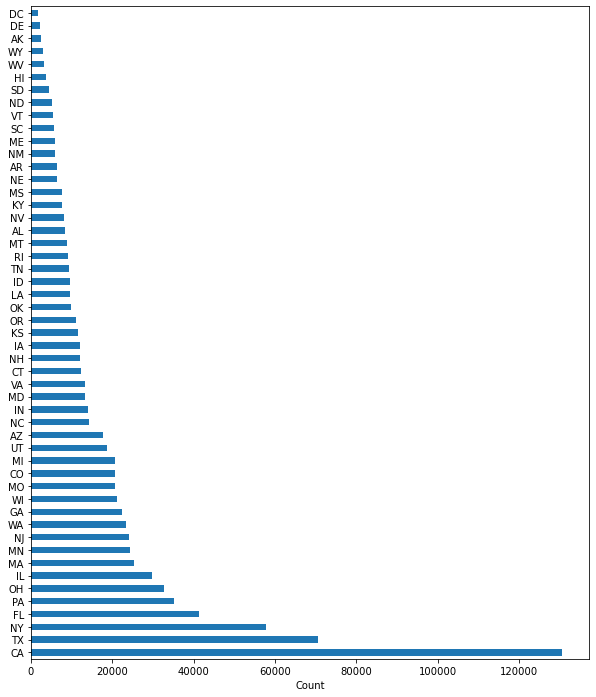

In [12]:
# Plot count (or total number of loans) for each state
df['State'].value_counts().plot(kind='barh').set_xlabel('Count')
plt.rcParams['figure.figsize']=[10,12]
plt.show()

The state of California significantly leads the count for most number of loans applied, followd by Texas and New York.

### 3.3 Number of instances for each sector<a id='3.3_Number_of_instances_for_each_sector'></a>

In [13]:
# Create a DataFrame for different economic sectors (based on NAICS)
# NOTE: first two digits of the NAICS classification represent the economic sector
sectordict = {'sector':[11,21,22,23,'31-33',42,'44-45','48-49',51,52,53,54,55,56,
                        61,62,71,72,81,92],
              'Description':['Agriculture, forestry, fishing and hunting',
                           'Mining, quarrying, and oil and gas extraction',
                           'Utilities',
                            'Construction',
                            'Manufacturing',
                            'Wholesale trade',
                            'Retail trade',
                            'Transportation and warehousing',
                            'Information',
                            'Finance and insurance',
                            'Real estate and rental and leasing',
                            'Professional, scientific, and technical services',
                            'Management of companies and enterprises',
                            'Administrative and support and waste management and \
                            remediation services',
                            'Educational services',
                            'Health care and social assistance',
                            'Arts, entertainment, and recreation',
                            'Accommodation and food services',
                            'Other services (except public administration)',
                            'Public administration']}
sectordf = pd.DataFrame(data=sectordict)
sectordf

,sector,Description
0,11,"Agriculture, forestry, fishing and hunting"
1,21,"Mining, quarrying, and oil and gas extraction"
2,22,Utilities
3,23,Construction
4,31-33,Manufacturing
5,42,Wholesale trade
6,44-45,Retail trade
7,48-49,Transportation and warehousing
8,51,Information
9,52,Finance and insurance


Percentage of zero values in "Sector": 22.46%


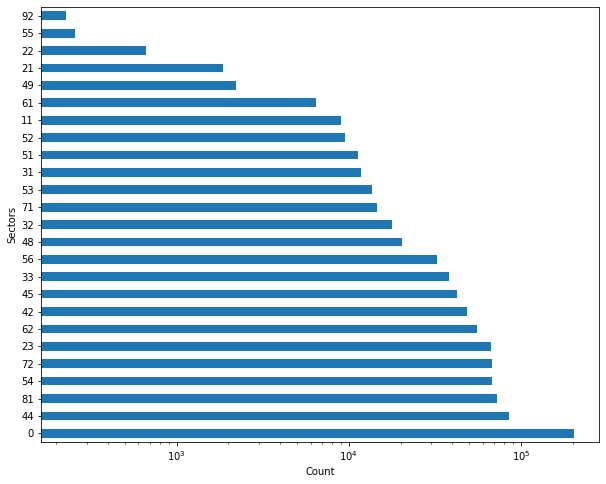

In [15]:
# Create a "Sector" column to indicate the economic sector
df['Sector'] = df['NAICS'].apply(str).apply(lambda v: v[:2])
df['Sector'] = df['Sector'].apply(int)

# Print percentage of zero values in "Sector"
print('Percentage of zero values in "Sector": ' 
      + str("{:.2f}".format((df['Sector']==0).mean()*100)) + "%")

# Plot number of businesses for each economic sector
df['Sector'].value_counts().plot(kind='barh').set_xlabel("Count")
plt.rcParams['figure.figsize']=[10,8]
plt.xscale('log')
plt.ylabel('Sectors')
plt.show()

About 22.46% of the instances do not have a value for the feature "Sector". This missing information is investigated further in Section 4.1. The top five sectors with most instances are: Retail trade, Other services (except public administration), Professional, scientific, and technical services, Accommodation and food services, and Construction.

In [16]:
# Check data type of "NAICS" and "Sector"
print("Data types")
print("NAICS:", df["NAICS"].dtype)
print("Sector:", df["Sector"].dtype)

Data types
NAICS: int64
Sector: int64


### 3.4 Target variable<a id='3.4_Target_variable'></a>

The feature "MIS_Status" is the variable that indicates the status of the loan: defaulted/charged off (CHGOFF) or have been successfully paid in full (PIF).

Unique values: ['P I F' 'CHGOFF' nan]
Percentage of null values in "MIS_Status": 0.22%


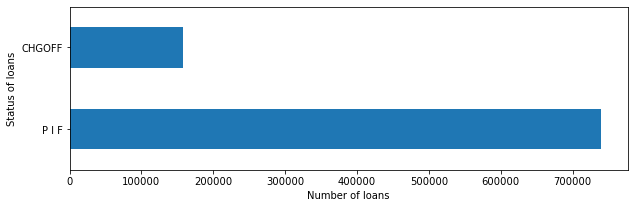

In [18]:
# Target variable: 'MIS_Status'
# Plot number of loans defaulted vs. loans paid in full
plt.rcParams['figure.figsize']=[10,3]
df['MIS_Status'].value_counts().plot(kind='barh').set_xlabel('Number of loans')
plt.ylabel('Status of loans')

print("Unique values:", df["MIS_Status"].unique())
print('Percentage of null values in "MIS_Status": ' 
      + str("{:.2f}".format(df['MIS_Status'].isnull().mean()*100)) + "%")

As seen in the barplot above, there are more instances of loans paid in full than of defaulted loans. This imbalance in the dataset is dealt with in Step Three of the project.

In [19]:
# Create a numeric column for the target variable 'MIS_Status' (where CHGOFF=1, PIF=0)
# Now target variable: 'Default'
df['Default'] = (df['MIS_Status']=='CHGOFF').astype('category').cat.codes
df.iloc[(df[df['MIS_Status'].isnull()].index),df.columns.get_loc("Default")] = np.nan

# Check if the column values are computed correctly
print(df['MIS_Status'].value_counts())
df['Default'].value_counts()

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64


0.0    739609
1.0    157558
Name: Default, dtype: int64

In [20]:
# Print number of unique ApprovalFY (fiscal year of commitment by SBA)
df['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1962', '1982',
       '1965', '1966', '1983', '1973', '1984', '2007', '1985', '1986',
       '1987', '2008', '1988', '2009', '1989', '1991', '1990', '1974',
       '2010', '1967', '2011', '1992', '1993', '2002', '2012', '2013',
       '1994', '2014', '1975', '1977', '1976', '1968', '1976A', '1969',
       '1995', '1970', '1996', '1971'], dtype=object)

In [21]:
# Compute the number of "1976A" values
(df['ApprovalFY']=='1976A').sum()

18

In [22]:
# Replace the year "1976A" with "1976"
df['ApprovalFY'] = df['ApprovalFY'].replace("1976A","1976")
(df['ApprovalFY']=='1976A').sum()

0

In [23]:
# Check the unique values again
df['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1962', '1982',
       '1965', '1966', '1983', '1973', '1984', '2007', '1985', '1986',
       '1987', '2008', '1988', '2009', '1989', '1991', '1990', '1974',
       '2010', '1967', '2011', '1992', '1993', '2002', '2012', '2013',
       '1994', '2014', '1975', '1977', '1976', '1968', '1969', '1995',
       '1970', '1996', '1971'], dtype=object)

In [24]:
# Check data types for the DataFrame
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
Sector                 int64
Default              float64
dtype: object

Most of the features are of the data type that is expected. Other features are investigated later in the project.

## 4 Choose a state<a id='4_Choose_a_state'></a>

The dataset contains instances for all 50 U.S. states, and as stated in the article, the 50 states and Washington DC have different economic environments in which they operate, resulting in different default rates. Therefore, it would be best to analyze the data for each state separately. For this reason, the state of California is analyzed in this project. 

In [25]:
# Check null entries for the "State" feature
df[df["State"].isnull()][["City", "Zip"]]

,City,Zip
35517,PENNSVILLE,8070
49244,JOHNSTOWN NY,0
264664,CAMERON PARK,95682
306274,"BOX 267, APO AP",96205
328526,WICHITA,67219
351072,"1542,TABUK,SAUDI ARABIA",79925
366139,PALM BEACH GARDENS,33410
366158,CASCO,54205
367007,SOMERSET,54025
379174,SALT LAKE CITY,84124


In [26]:
# Drop entries with no information available
df.drop(df.index[[35517, 306274]], inplace=True)

# Edit entries with information confirmed from the web
df.loc[49244, ['Zip', 'State']] = [12095, 'NY']
df.loc[264664, 'State'] = 'CA'
df.loc[328526, 'State'] = 'KS'
df.loc[[351072,869948,871847,885335], 'State'] = 'TX'
df.loc[366139, 'State'] = 'FL'
df.loc[[366158,367007], 'State'] = 'WI'
df.loc[379174, 'State'] = 'UT'
df.loc[385418, 'State'] = 'MO'

In [27]:
# Choose a state from the 'State' feature
dfCA = df[df['State']=='CA']

In [28]:
# Remove features that are redundant and/or not related to the target variable
dfCA = dfCA.drop(['State', 'Bank', 'BankState', 'NAICS', 'FranchiseCode', 
                  'LowDoc', 'RevLineCr', 'MIS_Status'], axis=1);

In [29]:
# Check shape of dataframe
dfCA.shape

(130620, 21)

### 4.1 Data wrangling<a id='4.1_Data_wrangling'></a>

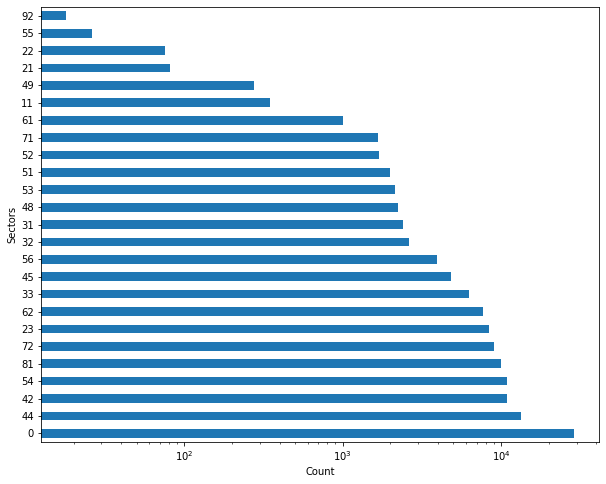

Percentage of zero values in "Sector": 21.97%


In [31]:
# Plot total number of loans per sector for California                                       
dfCA['Sector'].value_counts().plot(kind='barh').set_ylabel('Sectors')
plt.rcParams['figure.figsize']=[10,8]
plt.xscale('log')
plt.xlabel('Count')
plt.show()

print('Percentage of zero values in "Sector": ' 
      + str(((dfCA['Sector']==0).mean()*100).round(2)) + "%")

About 21.97% of the instances do not have a value for the feature "Sector". The top five sectors with most instances are: Retail trade, Wholesale trade, Professional, scientific, and technical services, Other services (except public administration), and Accommodation and food services.

In [32]:
# Calculate null (NaN) entries for California
valnan = pd.concat([dfCA.isnull().sum(axis=0), (dfCA.isnull().mean()*100).round(2)], axis=1)
valnan['Feature'] = valnan.index
valnan.columns = ['Number of NaN values for CA','% of NaN values for CA','Feature']
valnan = valnan[['Feature','Number of NaN values for CA',
                 '% of NaN values for CA']].reset_index(drop=True)
valnan[valnan['Number of NaN values for CA'] > 0]

,Feature,Number of NaN values for CA,% of NaN values for CA
2,City,6,0.00
8,NewExist,11,0.01
12,ChgOffDate,105713,80.93
13,DisbursementDate,283,0.22
20,Default,131,0.10


The feature "ChgOffDate" has about 80% of missing values. This could be due to the fact that a lot of the instances are of loans that are paid in full, which do not have a charge-off date.

In [33]:
# Check number of defaulted loans for "ChgOffDate"
print(dfCA[dfCA['ChgOffDate'].isnull()]['Default'].value_counts())

0.0    105578
1.0        13
Name: Default, dtype: int64


As expected, most of the instances are of loans paid in full, and hence do not have a charge-off date. The 13 instances of defaulted loans are investigated below.

In [34]:
# Check other features for defaulted entries
dfCA[(dfCA['ChgOffDate'].isnull()) & (dfCA['Default']==1)]\
[['ChgOffPrinGr', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'Sector']]

,ChgOffPrinGr,DisbursementGross,GrAppv,SBA_Appv,Sector
3589,0.0,159300.0,159300.0,119475.0,23
373554,0.0,530000.0,530000.0,345030.0,0
409550,0.0,400000.0,400000.0,272000.0,0
432632,0.0,350000.0,350000.0,288050.0,0
449187,0.0,153000.0,153000.0,137700.0,0
455839,0.0,310000.0,310000.0,248000.0,0
457366,0.0,366000.0,366000.0,292800.0,23
458037,0.0,219000.0,219000.0,186150.0,0
464730,0.0,250000.0,250000.0,200000.0,0
467985,0.0,630000.0,630000.0,504000.0,23


Since, the instances above do not have a corresponding charged-off amount ("ChgOffPrinGr"), it is not clear whether these are instances of defaulted loans. Most of them are also missing the "Sector" information. These instances are kept for now and investigated further. The null values of "ChgOffDate" are imputed to zero.

In [35]:
# Change values for "ChgOffDate" to zero where necessary
dfCA["ChgOffDate"].fillna(0, inplace=True)

In [36]:
# Check default entries for "ChgOffPrinGr"
print(dfCA.groupby(['Default'])['ChgOffPrinGr'].describe())
dfCA.groupby(['Default'])['ChgOffPrinGr'].value_counts()

            count          mean            std  min       25%      50%  \
Default                                                                  
0.0      106329.0    194.361077    5780.858723  0.0      0.00      0.0   
1.0       24160.0  74043.167301  143893.719487  0.0  14270.75  30955.5   

             75%        max  
Default                      
0.0          0.0   990516.0  
1.0      63809.0  2157499.0  


Default  ChgOffPrinGr
0.0      0.0             105582
         10000.0             11
         5000.0               6
         12000.0              4
         15000.0              4
                          ...  
1.0      1893690.0            1
         1906870.0            1
         1915766.0            1
         1999999.0            1
         2157499.0            1
Name: ChgOffPrinGr, Length: 19260, dtype: int64

This is interesting. Most of the values for the feature "ChgOffPrinGr" for the loans paid in full are zero, as they should be, however, there are some values that are not zero. Similarly, there are instances of defaulted loans with a value of zero for "ChgOffPrinGr" (as also seen previously).

In [37]:
# Number of entries when default = 0 but charged-off amount > 0
print("Number of instances when default=0 and charged-off amount > 0: %s"\
      %((dfCA['Default']==0) & (dfCA['ChgOffPrinGr'] > 0)).sum())

Number of instances when default=0 and charged-off amount > 0: 747


In [38]:
# Check condition for charged-off date
chk_cond = ((dfCA['Default']==0) & (dfCA['ChgOffPrinGr'] > 0))
print("Number of instances when default=0, charged-off amount > 0, and charged-off \
date=0: %s" %(dfCA[chk_cond]['ChgOffDate']==0).sum())

Number of instances when default=0, charged-off amount > 0, and charged-off date=0: 0


In [39]:
# Check condition for "DisbursementGross"
dfCA[chk_cond]['DisbursementGross'].describe()

count        747.000000
mean       67989.232932
std       125949.565970
min         5000.000000
25%        10000.000000
50%        25000.000000
75%        64803.000000
max      1000000.000000
Name: DisbursementGross, dtype: float64

Since, the above instances have a charged-off amount > 0 and also a corresponding charged-off date (zero instances of default=0, charged-off amount > 0, and charged-off date=0), the "Default" values of these instances are changed to 1.

In [40]:
# Change default value of abouve entries
dfCA.loc[dfCA[chk_cond].index, 'Default'] = 1
dfCA[chk_cond]['Default'].sum()

747.0

In [41]:
# Number of entries when default = 1 but charged-off amount = 0
print("Number of instances when default=1 and charged-off amount=0: %s"\
      %((dfCA['Default']==1) & (dfCA['ChgOffPrinGr'] == 0)).sum())

Number of instances when default=1 and charged-off amount=0: 101


In [42]:
# Check condition for charged-off date
chk_cond = ((dfCA['Default']==1) & (dfCA['ChgOffPrinGr'] == 0))
print("Number of instances when default=1, charged-off amount=0, and charged-off \
date=0: %s" %(dfCA[chk_cond]['ChgOffDate']==0).sum())

Number of instances when default=1, charged-off amount=0, and charged-off date=0: 13


In [43]:
# Check condition for certain features
chk_cond = ((dfCA['Default']==1) & (dfCA['ChgOffPrinGr']==0) & (dfCA['ChgOffDate']==0))
dfCA[chk_cond][['Term','DisbursementGross','GrAppv','SBA_Appv','Sector']]

,Term,DisbursementGross,GrAppv,SBA_Appv,Sector
3589,294,159300.0,159300.0,119475.0,23
373554,267,530000.0,530000.0,345030.0,0
409550,72,400000.0,400000.0,272000.0,0
432632,106,350000.0,350000.0,288050.0,0
449187,239,153000.0,153000.0,137700.0,0
455839,236,310000.0,310000.0,248000.0,0
457366,237,366000.0,366000.0,292800.0,23
458037,235,219000.0,219000.0,186150.0,0
464730,95,250000.0,250000.0,200000.0,0
467985,184,630000.0,630000.0,504000.0,23


These are the same instances seen above while investigating for the feature "ChgOffDate". Since there is no clear information that suggests that these are instances of defaulted loans (zero values for charged-off amount and charged-off date), these instances are removed.

In [44]:
# Remove the above entries
dfCA.drop(dfCA[chk_cond].index, inplace=True)

# Check shape of dataframe
dfCA.shape

(130607, 21)

The feature "DisbursementDate" has about 0.22% of null values. This is investigated below.

In [45]:
# Check number of defaulted loans for "DisbursementDate"
print(dfCA[dfCA['DisbursementDate'].isnull()]['Default'].value_counts())

0.0    226
1.0     42
Name: Default, dtype: int64


In [46]:
# Compute number of null entries in "DisbursementDate" and zero entries in "DisbursementGross"
chk_cond = ((dfCA['DisbursementDate'].isnull()) & (dfCA['DisbursementGross']==0))
print("Number of instances when disbursement date is null and DisbursementGross=0: %s" \
      %(chk_cond.sum()))

Number of instances when disbursement date is null and DisbursementGross=0: 15


In [47]:
# Check other features for defaulted entries
dfCA[chk_cond][['ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'Default', 'Sector', 
                'NoEmp', 'NewExist', 'UrbanRural']]

,ChgOffPrinGr,GrAppv,SBA_Appv,Default,Sector,NoEmp,NewExist,UrbanRural
29418,17220.0,20000.0,20000.0,NaN,0,2,2.0,0
35331,13111.0,14000.0,14000.0,NaN,0,1,1.0,0
35751,187765.0,237600.0,237600.0,NaN,0,6,1.0,0
479239,0.0,567000.0,481950.0,NaN,0,2,1.0,0
667567,0.0,988000.0,988000.0,NaN,33,50,1.0,1
783862,12352.0,50000.0,50000.0,NaN,0,12,1.0,0
783864,18235.0,20000.0,20000.0,NaN,0,5,2.0,0
783921,41.0,20000.0,20000.0,NaN,0,1,1.0,0
809900,0.0,1048000.0,1048000.0,NaN,44,1,2.0,1
820338,0.0,290000.0,290000.0,NaN,42,12,1.0,0


All the above instances have null values for the feature "DisbursementDate" and zero values for the feature "DisbursementGross", along with null values for the feature "Default" and only some instances with a value for the feature "ChgOffPrinGr". Since it is not clear how best to edit these instances, even while taking into consideration other features as seen above, these instances are removed.

In [48]:
# Remove the selected rows
dfCA.drop(dfCA[chk_cond].index, inplace=True)

# Change values for "DisbursementDate" to zero where necessary
dfCA["DisbursementDate"].fillna(0, inplace=True)

# Check shape of dataframe
dfCA.shape

(130592, 21)

In [49]:
# Check number of zero entries in "DisbursementGross"
print('Number of zero values in "DisbursementGross": ' 
      + str((dfCA['DisbursementGross']==0).sum()))

Number of zero values in "DisbursementGross": 4


In [50]:
# Check other features when "DisbursementGross" = 0
dfCA[dfCA['DisbursementGross']==0][['ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'Default']]

,ChgOffPrinGr,GrAppv,SBA_Appv,Default
234335,0.0,50000.0,40000.0,NaN
469037,0.0,723000.0,614550.0,NaN
525521,0.0,75000.0,37500.0,NaN
526437,0.0,250000.0,187500.0,NaN


Since the above instances have no information for "DisbursementGross" and "ChgOffPrinGr", and have null values for "Default", these instances are removed.

In [51]:
# Remove selected rows
dfCA.drop(dfCA[dfCA['DisbursementGross']==0].index, inplace=True)

# Check number of zero entries in "DisbursementGross"
print('Number of zero values in "DisbursementGross": ' 
      + str((dfCA['DisbursementGross']==0).sum()))

Number of zero values in "DisbursementGross": 0


In [52]:
# Check shape of dataframe
dfCA.shape

(130588, 21)

In [53]:
# Check number of null entries in "Default"
print('Number of null values in "Default": ' + str((dfCA['Default'].isnull().sum())))

Number of null values in "Default": 112


In [54]:
# Check other features for null entries in "Default"
chk_cond = ((dfCA['Default'].isnull()) & (dfCA['ChgOffPrinGr']==0) & (dfCA['ChgOffDate']==0))
print('Number of instances when default value is null, "ChgOffPrinGr"=0, and \
"ChgOffDate"=0: %s' %(chk_cond.sum()))

Number of instances when default value is null, "ChgOffPrinGr"=0, and "ChgOffDate"=0: 109


In [55]:
# Check other features for null entries in "Default"
chk_cond = ((dfCA['Default'].isnull()) & (dfCA['ChgOffPrinGr']!=0) & (dfCA['ChgOffDate']!=0))
print('Number of instances when default value is null, "ChgOffPrinGr"!=0, and \
"ChgOffDate"!=0: %s' %(chk_cond.sum()))

Number of instances when default value is null, "ChgOffPrinGr"!=0, and "ChgOffDate"!=0: 3


In [56]:
# Print instances for above condition
dfCA[chk_cond].T

,219264,219988,623412
LoanNr_ChkDgt,2550136006,2554746009,6191154004
Name,KING'S RESTORATION SERVICES IN,JULIAN BECERRA CHAVEZ,FLOWERS BY ESTHER
City,WEST HOLLYWOOD (BR. P.O. NAME,LONG BEACH,VENTURA (CORPORATE NAME SAN BU
Zip,90069,90813,93003
ApprovalDate,28-Nov-06,30-Nov-06,21-Mar-03
ApprovalFY,2007,2007,2003
Term,56,42,50
NoEmp,12,1,2
NewExist,1,1,1
CreateJob,3,0,3


Since the above instances have relevant information on "DisbursementGross", "ChgOffPrinGr", "ChgOffDate", "GrAppv", "SBA_Appv", and all other features, these instances are imputed to have "Default" values of 1 (given that "ChgOffPrinGr" > 0).

In [57]:
# Change default values for the above 3 entries
dfCA.loc[dfCA[chk_cond].index, 'Default'] = 1
dfCA.loc[dfCA[chk_cond].index, 'Default']

219264    1.0
219988    1.0
623412    1.0
Name: Default, dtype: float64

In [58]:
# Check number of null entries in "Default"
print('Number of null entries in "Default": ' + str((dfCA['Default'].isnull().sum())))

Number of null entries in "Default": 109


In [59]:
# Check other features for null entries in "Default"
chk_cond = ((dfCA['Default'].isnull()) & (dfCA['ChgOffPrinGr']==0) & (dfCA['ChgOffDate']==0))

In [60]:
# Generate a feature "Term_yr" converting months to year
dfCA = dfCA.assign(Term_yr = pd.Series(dfCA['Term']/12))

# Check entries when default value is null, "ChgOffPrinGr"=0, and "ChgOffDate"=0
print('Number of loan years for instances when default value is null, \
"ChgOffPrinGr"=0, and "ChgOffDate"=0:')
dfCA[chk_cond]['Term_yr'].value_counts()

Number of loan years for instances when default value is null, "ChgOffPrinGr"=0, and "ChgOffDate"=0:


1.0     52
7.0     35
2.0      6
3.0      5
25.0     5
5.0      3
10.0     2
6.5      1
Name: Term_yr, dtype: int64

The range of the number of loan years seems plausible with most of the instances having loan term years between 1 to 7 years. However, there are few outliers with the number of loan years of 10 and 25. While a loan term of 10 years might be possible for some big companies, a loan term of 25 years is possible (only) for companies in sectors like real estate. As mentioned in the article cited in the introduction, since the term of the loan is a function of the expected lifetime of the assets, loans backed by real estate will have terms 20 years or greater (>240 months) and are the only loans granted for such a long term. This is because a loan backed by real estate (possession of land) has a lower probability of default, since the value of the land is often large enough to cover the amount of any principal outstanding.

In [61]:
# Check instances for loan years >= 25
tmp = dfCA[chk_cond]
tmp[tmp['Term_yr']==25].T

,7659,147135,354741,797660,836368
LoanNr_ChkDgt,1051944000,2074934005,3470634005,8526024002,8970654010
Name,WIRSHING SIGN COMPANY,SOUTHERN CALIFORNIA ENTERPRISE,NATIONAL ELECTRIC WORKS INC,RAMI DESIGNS INC,M T MOBILE FIELD SERVICES INC
City,LOS ANGELES,LOS ANGELES,SAN DIEGO,IRVINE,CARSON
Zip,90065,90026,92120,92618,90248
ApprovalDate,20-Mar-97,20-May-98,14-Dec-99,25-Jan-05,6-Jul-05
ApprovalFY,1997,1998,2000,2005,2005
Term,300,300,300,300,300
NoEmp,4,3,46,9,10
NewExist,1,1,1,1,1
CreateJob,0,0,10,2,3


The above instances do not have enough evidence, for example, very low values for "DisbursementGross", zero values for "Sector" with some not in the real estate category, etc., that suggests that these instances are loans backed by real estate. The names of the companies also do not indicate this. Therefore, it is unlikely that these instances had a loan term of 25 years. Hence, these instances are removed.

In [62]:
# Remove selected rows
dfCA.drop(tmp[tmp['Term_yr']==25].index, inplace=True)

# Check shape of dataframe
dfCA.shape

(130583, 22)

In [63]:
# Recalculate null (NaN) entries for California
valnan = pd.concat([dfCA.isnull().sum(axis=0), (dfCA.isnull().mean()*100).round(2)], axis=1)
valnan['Feature'] = valnan.index
valnan.columns = ['Number of NaN values for CA','% of NaN values for CA','Feature']
valnan = valnan[['Feature','Number of NaN values for CA',
                 '% of NaN values for CA']].reset_index(drop=True)
valnan[valnan['Number of NaN values for CA'] > 0]

,Feature,Number of NaN values for CA,% of NaN values for CA
2,City,6,0.00
8,NewExist,11,0.01
20,Default,104,0.08


In [64]:
# Check value counts for "NewExist"
dfCA['NewExist'].value_counts()

1.0    108921
2.0     21539
0.0       112
Name: NewExist, dtype: int64

As mentioned in the beginning, the different categories for the feature "NewExist" are: 1 = Existing business, and 2 = New business. There are 112 instances with zero values for this feature. This is investigated later.

In [65]:
# Check instances when "NewExist" has null entries
dfCA[dfCA['NewExist'].isnull()].T

,404372,406520,413296,417011,430409,431671,432043,436129,437623,449483,451814
LoanNr_ChkDgt,3901595005,3924435006,3994865001,4029705002,4164215000,4178955000,4182955003,4230435006,4246085002,4360675006,4381315002
Name,Riviera Construction Corporati,Avo's Auto Center Inc.,Fast Track Food & Fuel Inc,Sole Support,Institute of Medical Education,"Improta, Inc.","Apogee, Inc.","Flowers 4 Less, Inc.",JST IMAGINATION LLC,DERMATOLOGY AND HAIR RESTORATI,Siempre Adelante LLC
City,SAN CLEMENTE,NORTH HOLLYWOOD,REDDING,TOLLHOUSE,SAN JOSE,SANTA MONICA,BREA,ANAHEIM,CLAYTON,SANTA MONICA,PASO ROBLES
Zip,92672,91606,96003,93667,95113,90403,92821,92804,94517,90404,93446
ApprovalDate,11-Feb-10,19-Feb-10,25-Mar-10,15-Apr-10,13-Jul-10,23-Jul-10,28-Jul-10,30-Aug-10,10-Sep-10,10-Nov-10,22-Nov-10
ApprovalFY,2010,2010,2010,2010,2010,2010,2010,2010,2010,2011,2011
Term,84,300,84,84,115,84,84,281,84,84,300
NoEmp,3,5,11,1,50,2,33,1,1,2,0
NewExist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreateJob,0,0,0,0,6,1,5,0,0,2,6


A quick search on the web gives the following results:
* Existing business: Riviera Construction Corporation, Avos Auto Center Inc., Fast Track Food & Fuel Inc, Improta, Inc., Apogee, Inc., DERMATOLOGY AND HAIR RESTORATI 
* New business: Siempre Adelante LLC

The entries for businesses: Sole Support, Institute of Medical Education, Flowers 4 Less, Inc., and JST IMAGINATION LLC, are removed since there is no information available on their year of establishment.

In [66]:
# Edit "NewExist" feature for companies with information available on the web
index_list_existing = [404372, 406520, 413296, 431671, 432043, 449483]
index_list_new = 451814
index_list_remove = [417011, 430409, 436129, 437623]
dfCA.loc[index_list_existing, 'NewExist'] = 1
dfCA.loc[index_list_new, 'NewExist'] = 2
dfCA.drop(index=index_list_remove, inplace=True)

In [67]:
# Change data type of "NewExist" from float to int
dfCA["NewExist"] = dfCA["NewExist"].astype("int")

# Check data type of "NewExist"
dfCA["NewExist"].dtype

dtype('int64')

In [68]:
# Recalculate null (NaN) entries for California
valnan = pd.concat([dfCA.isnull().sum(axis=0), (dfCA.isnull().mean()*100).round(2)], axis=1)
valnan['Feature'] = valnan.index
valnan.columns = ['Number of NaN values for CA','% of NaN values for CA','Feature']
valnan = valnan[['Feature','Number of NaN values for CA',
                 '% of NaN values for CA']].reset_index(drop=True)
valnan[valnan['Number of NaN values for CA'] > 0]

,Feature,Number of NaN values for CA,% of NaN values for CA
2,City,6,0.00
20,Default,104,0.08


As seen above, only 6 intances have null values for the feature "City". Since features like "City" and "Zip" are not very useful predictor variables, i.e., they would not help much in predicting defaulted vs. non-defaulted loans, these feature are removed.

In [69]:
# Remove remaining entries with null values, and other irrelevant features
dfCA = dfCA.drop(['City', 'Zip', 'Term_yr'], axis=1)

In [70]:
# Check charged-off date for null default entries
dfCA[dfCA["Default"].isnull()]['ChgOffDate'].value_counts()

0    104
Name: ChgOffDate, dtype: int64

In [71]:
# Display statisical information for features for null default entries
dfCA[dfCA["Default"].isnull()].drop(['LoanNr_ChkDgt', 'Sector'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Term,104.0,42.173077,34.850149,12.0,12.00,18.0,84.00,120.0
NoEmp,104.0,130.057692,703.703446,1.0,3.00,71.0,118.75,7212.0
NewExist,104.0,1.125000,0.332320,1.0,1.00,1.0,1.00,2.0
CreateJob,104.0,32.384615,52.243698,0.0,0.00,1.0,25.00,124.0
RetainedJob,104.0,57.134615,61.125537,0.0,1.75,13.5,110.00,145.0
UrbanRural,104.0,1.500000,0.591198,0.0,1.00,2.0,2.00,2.0
DisbursementGross,104.0,2070.480769,996.089519,62.0,1500.00,2000.0,3000.00,3900.0
BalanceGross,104.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
ChgOffPrinGr,104.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
GrAppv,104.0,12449.038462,20884.178967,1000.0,1500.00,3000.0,10000.00,118500.0


There are 104 instances where the feature "Default" has null values. The features "ChgOffDate" and "ChgOffPrinGr" have all zero values. So it is uncertain if these are defaulted loans or loans paid in full. Since the dataset is big enough (130,579 rows/instances), and it is unclear how best to impute these null values, it is better to remove these instances than make erroneous assumptions. Another option is to save these instances as a test dataset that can be used later to predict the default values using an optimal machine learning model. 

In [72]:
# Save data with null default entries in another variable
dfCA_test_data = dfCA[dfCA['Default'].isnull()]

# Remove entries with null default values
dfCA.drop(dfCA[dfCA['Default'].isnull()].index, inplace=True)

In [73]:
# Check if features "GrAppv" and "SBA_Appv" have zero entries
(dfCA["GrAppv"]==0).sum()
print('Percentage of zero values in "GrAppv": ' + 
      str("{:.3f}".format((dfCA['GrAppv']==0).mean()*100)) + "%")
print('Percentage of zero values in "SBA_Appv": ' + 
      str("{:.3f}".format((dfCA['SBA_Appv']==0).mean()*100)) + "%")

Percentage of zero values in "GrAppv": 0.000%
Percentage of zero values in "SBA_Appv": 0.000%


In [74]:
# Check shape of dataframe
dfCA.shape

(130475, 19)

In [75]:
# Check data type of the dataframe
dfCA.dtypes

LoanNr_ChkDgt          int64
Name                  object
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist               int64
CreateJob              int64
RetainedJob            int64
UrbanRural             int64
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
Sector                 int64
Default              float64
dtype: object

In [76]:
# Change data type of "Default" from float to int
dfCA["Default"] = dfCA["Default"].astype("int")

# Check data type of "Default"
dfCA["Default"].dtype

dtype('int64')

In [77]:
# Target variable: 'Default'
# Display value counts for non-default and default loans
display(dfCA.Default.value_counts())

# Print percentage of null values in "Default"
print('Percentage of null values in "Default": ' + 
      str("{:.2f}".format(dfCA['Default'].isnull().mean()*100)) + "%")

0    105578
1     24897
Name: Default, dtype: int64

Percentage of null values in "Default": 0.00%


### 4.2 Save data<a id='4.2_Save_data'></a>

In [78]:
# Save data for exploratory data analysis and preprocessing
datapath = '../data_models'
if not os.path.exists(datapath):
    os.mkdir(datapath)

# Save clean data
datapath_cleandata = os.path.join(datapath, 'SBAnational_CA_clean.csv')
dfCA.to_csv(datapath_cleandata, index=False)

# Save clean test data
datapath_cleantestdata = os.path.join(datapath, 'SBAnational_CA_clean_testdata.csv')
dfCA_test_data.to_csv(datapath_cleantestdata, index=False)

## 5 Summary<a id='5_Summary'></a>

In summary, this data science project addresses the question of how can machine learning help in making decisions about whether a loan should be approved or denied by the U.S. SBA? The original dataset has 899164 instances/observations and 27 features. This includes instances for loans approved for small businesses across all the 50 states in the U.S. Since all states have different economic environments in which they operate, resulting in different default rates, data/instances from one state (California) are selected to be analyzed for this project.

After initial data wrangling and cleaning, the final dataset ("SBAnational_CA_clean.csv") has 130475 instances and 19 features. The feature "Default" is the target feature with two classes: 0 for non-default loans, and 1 for default loans. The dataset is also imbalanced, with more instances of non-default loans (105578) than of default loans (24897). Additional dataset, "SBAnational_CA_clean_testdata.csv", that includes instances with null values for the feature "Default", is saved as a test dataset that can be used later to predict the default values using an optimal machine learning model. 